In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Plogin, Pleave= 0.2, 0.5


$\text{1. }$
$ P_{0} \text{ Transition Matrix in } t_{0}$

In [3]:
P0 = np.zeros((3,3),dtype=float)

# outputs from each node sums to 1.0
P0[0, 0] = 0.8**2
P0[0, 1] = 2.*0.2*0.8
P0[0, 2] = 0.2**2

P0[1, 0] = 0.8*0.5
P0[1, 1] = 0.8*0.5 + 0.2*0.5
P0[1, 2] = 0.5*0.2

P0[2, 0] = 0.5**2
P0[2, 1] = 2.*0.5*0.5
P0[2, 2] = 0.5**2

In [4]:
#check if proper matrix
P0.sum(axis=1)

array([1., 1., 1.])

$\text{2. }$
$\text{Find } P^{N} \text{for any } N\text{, check when } P^{N} - P^{N-1} $

In [5]:
def p_to_n(P,N):
    tmp = P.copy()
    for k in range(N):
        tmp = tmp @ tmp
    return tmp

In [6]:
np.any(P0 > 0.1)

True

In [7]:
find_n_bar = True
n_counter = 1
prev_p = P0.copy()
curr_p = P0.copy()
# curr_p *= P0 # n == 1
while(find_n_bar):
    curr_p = p_to_n(P0, n_counter)
    prev_p = p_to_n(P0, n_counter-1)
    diff = curr_p - prev_p
#     print(diff)
    if np.any(np.abs(diff) > 1.0e-5):
        n_counter+=1
    else:
        find_n_bar = False
n_bar = n_counter
print("N bar value: {}".format(n_bar))

N bar value: 5


$\text{2.1 Plot diagonal values of } \textbf{P} \text{ in refere to } n $

In [8]:
n_count = 10
diagonals = np.zeros((n_count, 3))
for k in range(n_count):
    P = p_to_n(P0, k)
    diagonals[k, 0] = P[0, 0]
    diagonals[k, 1] = P[1, 1]
    diagonals[k, 2] = P[2, 2]
    

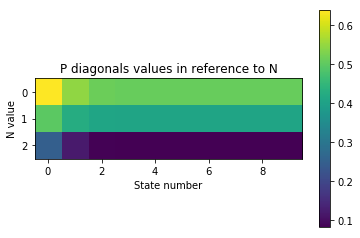

In [9]:
plt.imshow(diagonals.T, interpolation="nearest", origin="upper")
plt.colorbar()
plt.xlabel("State number")
plt.ylabel("N value")
plt.title("P diagonals values in reference to N")
plt.show()

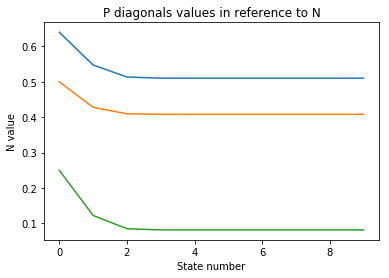

In [10]:
plt.plot(range(n_count), diagonals.T[0,:])
plt.plot(range(n_count), diagonals.T[1,:])
plt.plot(range(n_count), diagonals.T[2,:])
plt.xlabel("State number")
plt.ylabel("N value")
plt.title("P diagonals values in reference to N")
plt.show()

##### 3.

In [11]:

# returns randomly choosen next state
def transist(P, curr_state):
    assert curr_state < 3 and curr_state >= 0, "current state out of state space"
    return int(np.random.choice(range(3), 1, p=P[curr_state, :]))

def calculate_evolution_array(P0, S0, N, n_bar):
    S = S0
    results = np.zeros(N)
    # Number of evolutions
    for m in range(N):
    # many steps single evolution
        for k in range(n_bar):
            S = transist(P0, S)
        results[m] = S
    return results

In [12]:
S0, N, n_bar = 0, 10**4, 200

res = calculate_evolution_array(P0, S0, N, n_bar)

In [13]:
unique, counts = np.unique(res, return_counts=True)
counted_final_states = dict(zip(unique, counts))

In [14]:
counted_final_states

{0.0: 5055, 1.0: 4050, 2.0: 895}

### other initial states

In [ ]:
S0, N, n_bar = 1, 10**4, 200
res1 = calculate_evolution_array(P0, S0, N, n_bar)
S0, N, n_bar = 2, 10**4, 200
res2 = calculate_evolution_array(P0, S0, N, n_bar)

In [ ]:
unique, counts = np.unique(res1, return_counts=True)
one_starting_results = dict(zip(unique, counts))
unique, counts = np.unique(res2, return_counts=True)
two_starting_results = dict(zip(unique, counts))

In [ ]:
for k in counted_final_states.keys():
    counted_final_states[k] /= N
    one_start[k] /= N
    counted_final_states[k] /= N
